# Example usage of `OptimizedUnivariateEncoding`

This example shows how to generate a model and compute statistics on both numerical and categorical variables.

In [1]:
import pandas
import kuplift
import matplotlib.pyplot as plt
ue = kuplift.OptimizedUnivariateEncoding()
# Import data and set proper column types for categorical columns not already detected as such.
(df := pandas.read_csv("../data/data_uplift_missing.csv").astype({"VAR2": object, "CIBLE": object}))

,VAR1,VAR2,VAR3,VAR4,TRAITEMENT,CIBLE
0,NaN,0,11.076782,0.985791,T1,1
1,NaN,0,11.980937,0.606120,T1,1
2,NaN,0,11.800886,0.809460,T1,1
3,7.233434,7,24.466868,0.990217,T1,0
4,6.477910,6,22.955819,0.091321,T1,1
...,...,...,...,...,...,...
1995,6.100756,6,22.201511,0.400879,T0,0
1996,6.108354,6,22.216709,0.896717,T0,0
1997,3.531834,3,17.063668,0.785622,T0,1
1998,9.805668,9,29.611336,0.853881,T0,1


In [2]:
ue.fit(df[df.columns[:-2]], df["TRAITEMENT"], df["CIBLE"])

In [3]:
ue.get_levels()

[('VAR2', 0.973101), ('VAR1', 0.883716), ('VAR3', 0.881227), ('VAR4', 0)]

In [4]:
print(ue.get_partition("VAR1"))

Interval partition
    10 intervals:
      - []
      - [-inf, 2.0004[
      - [2.0004, 3.00025[
      - [3.00025, 4[
      - [4, 4.9983[
      - [4.9983, 5.991[
      - [5.991, 7.0002[
      - [7.0002, 8.0009[
      - [8.0009, 9[
      - [9, inf[


In [5]:
print(ue.get_partition("VAR2"))

Value group partition
    2 groups ("*" indicates the default group):
        - {8, 6, 0, 4, 2}
      * - {3, 7, 1, 5, 9}


## Statistics on numerical variable `VAR1`

In [6]:
ue.get_target_frequencies("VAR1")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,[],110,0,0,100
1,"[-inf, 2.0004[",0,92,100,0
2,"[2.0004, 3.00025[",95,0,0,97
3,"[3.00025, 4[",0,108,107,0
4,"[4, 4.9983[",97,0,0,106
5,"[4.9983, 5.991[",0,93,97,1
6,"[5.991, 7.0002[",106,0,0,113
7,"[7.0002, 8.0009[",1,91,103,0
8,"[8.0009, 9[",101,0,0,118
9,"[9, inf[",0,81,83,0


In [7]:
ue.get_target_probabilities("VAR1")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,[],1.000000,0.000000,0.000000,1.000000
1,"[-inf, 2.0004[",0.000000,1.000000,1.000000,0.000000
2,"[2.0004, 3.00025[",1.000000,0.000000,0.000000,1.000000
3,"[3.00025, 4[",0.000000,1.000000,1.000000,0.000000
4,"[4, 4.9983[",1.000000,0.000000,0.000000,1.000000
5,"[4.9983, 5.991[",0.000000,0.989362,1.000000,0.010638
6,"[5.991, 7.0002[",1.000000,0.000000,0.000000,1.000000
7,"[7.0002, 8.0009[",0.009615,1.000000,0.990385,0.000000
8,"[8.0009, 9[",1.000000,0.000000,0.000000,1.000000
9,"[9, inf[",0.000000,1.000000,1.000000,0.000000


In [8]:
(uplift_var1 := ue.get_uplift(1, "T0", "VAR1"))

,Part,Uplift 1 T1
0,[],1.000000
1,"[-inf, 2.0004[",-1.000000
2,"[2.0004, 3.00025[",1.000000
3,"[3.00025, 4[",-1.000000
4,"[4, 4.9983[",1.000000
5,"[4.9983, 5.991[",-0.989362
6,"[5.991, 7.0002[",1.000000
7,"[7.0002, 8.0009[",-0.990385
8,"[8.0009, 9[",1.000000
9,"[9, inf[",-1.000000


In [9]:
from kuplift.optimized_univariate_encoding import TargetTreatmentPair as TT
freqs_var1 = ue.get_target_frequencies("VAR1")
(avg_uplift_T1_T0 := freqs_var1[TT(1, "T1")].sum() / (freqs_var1[TT(1, "T1")].sum() + freqs_var1[TT(0, "T1")].sum()) - freqs_var1[TT(1, "T0")].sum() / (freqs_var1[TT(1, "T0")].sum() + freqs_var1[TT(0, "T0")].sum()))

np.float64(0.044999999999999984)

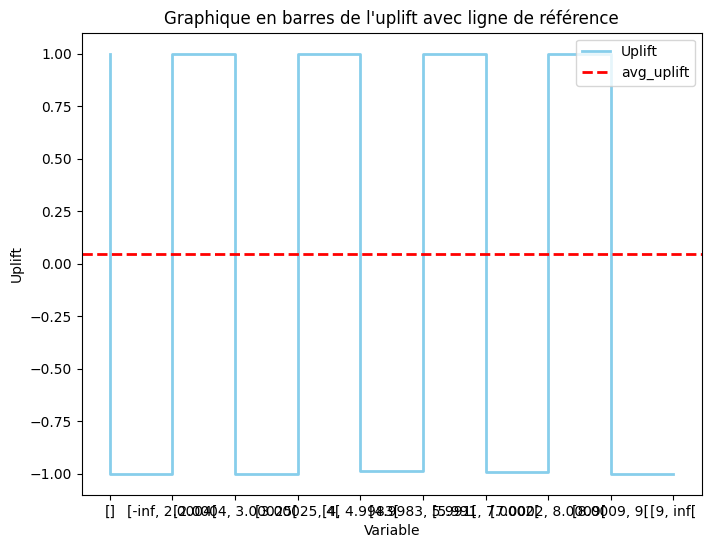

In [10]:
# Convertir la colonne 'Part' en labels
x_labels = uplift_var1['Part'].astype(str)
x_positions = range(len(x_labels))
 
plt.figure(figsize=(8, 6))
plt.step(x_positions, uplift_var1['Uplift 1 T1'],  color='skyblue', label='Uplift', linewidth=2)
 
# Ajouter les labels sous chaque barre
plt.xticks(x_positions, x_labels)
 
# Ajout de la ligne de référence
plt.axhline(y=avg_uplift_T1_T0, color='red', linestyle='--', linewidth=2, label='avg_uplift')
 
# Labels et titre
plt.xlabel('Variable')
plt.ylabel('Uplift')
plt.title("Graphique en barres de l'uplift avec ligne de référence")
plt.legend()
 
plt.show()

## Statistics on categorical variable `VAR2`

In [11]:
ue.get_target_frequencies("VAR2")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,"{8, 6, 0, 4, 2}",510,0,0,535
1,"{3, 7, 1, 5, 9}",0,465,490,0


In [12]:
ue.get_target_probabilities("VAR2")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,"{8, 6, 0, 4, 2}",1.0,0.0,0.0,1.0
1,"{3, 7, 1, 5, 9}",0.0,1.0,1.0,0.0


In [13]:
ue.get_uplift(1, "T0", "VAR2")

,Part,Uplift 1 T1
0,"{8, 6, 0, 4, 2}",1.0
1,"{3, 7, 1, 5, 9}",-1.0
